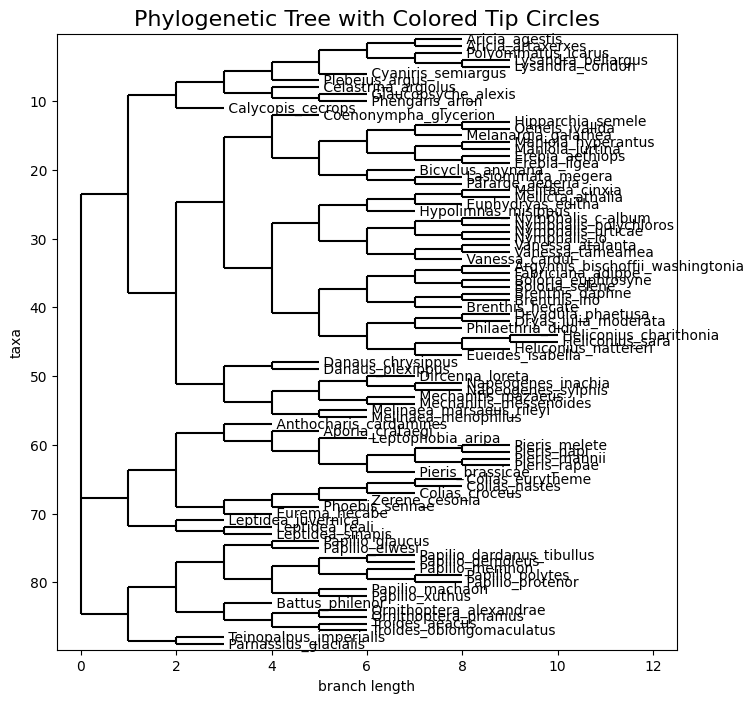

In [2]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Load the tree
tree = Phylo.read("/mnt/c/Users/Saurav Baral/Desktop/Newick Export_mega.nwk", "newick")

# Define a color mapping for the tips
tip_colors = {
    "Aricia_agestis": "red",
    "Tip2": "blue",
    "Tip3": "green",
    "Tip4": "orange",
}

# Draw the tree
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, do_show=False, axes=ax)

# Get the coordinates of the tips
terminals = tree.get_terminals()
coords = {clade: (ax.transData.transform((0, idx))[1], idx) for idx, clade in enumerate(terminals)}

# Add colored circles at the tips
for clade, (x, y) in coords.items():
    if clade.name in tip_colors:
        circle = plt.Circle((x + 0.02, y), radius=0.01, color=tip_colors[clade.name], transform=ax.transData)
        ax.add_artist(circle)

# Save the output
plt.title("Phylogenetic Tree with Colored Tip Circles", fontsize=16)
# plt.savefig("tree_with_colored_tips.png", dpi=300)
plt.show()

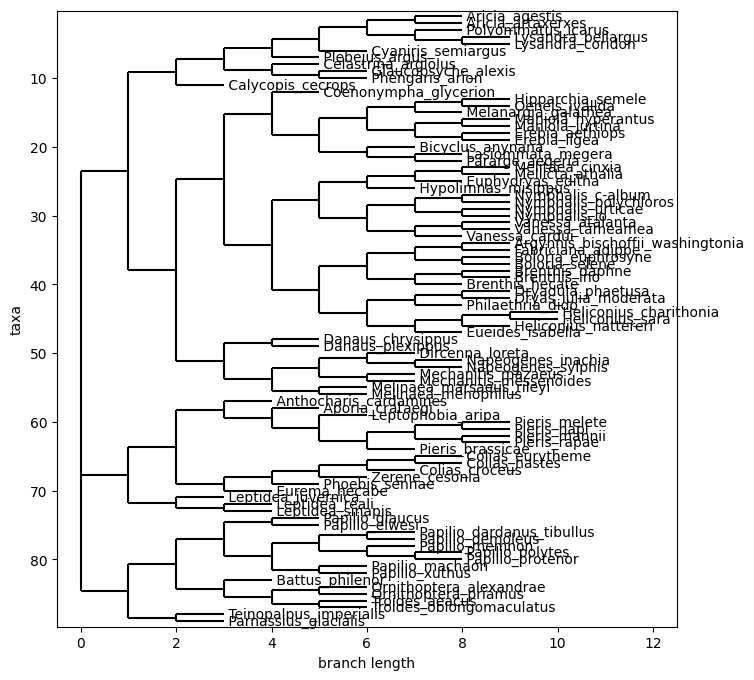

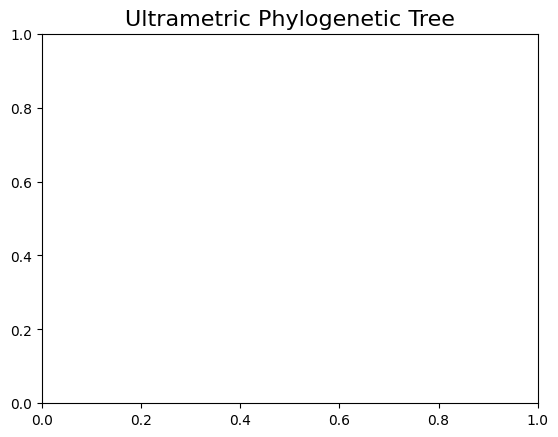

In [3]:
# Function to adjust terminal branches to make the tree visually ultrametric
def draw_ultrametric(tree):
    """
    Draws a phylogenetic tree as ultrametric.
    :param tree: A Bio.Phylo tree object.
    """
    # Compute the maximum depth of the tree (distance to tips)
    def get_max_depth(clade, current_depth=0):
        if clade.is_terminal():
            return current_depth
        return max(get_max_depth(child, current_depth + (child.branch_length or 0))
                   for child in clade.clades)

    max_depth = get_max_depth(tree.root)

    # Modify branch lengths for visualization
    def adjust_branches(clade, current_depth=0):
        if clade.is_terminal():
            clade.branch_length = max_depth - current_depth
        else:
            for child in clade.clades:
                adjust_branches(child, current_depth + (child.branch_length or 0))

    # Create a copy of the tree to avoid altering the original
    import copy
    tree_copy = copy.deepcopy(tree)
    adjust_branches(tree_copy.root)

    # Draw the adjusted tree
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree_copy, axes=ax)
    plt.title("Ultrametric Phylogenetic Tree", fontsize=16)
    plt.show()

# Call the function
draw_ultrametric(tree)